# Pymaceuticals Inc.
---

### Analysis
 - The most successful drug regimen was Ramicane followed very closely by Capomulin. 
 - There were roughly the same number of males and female mice, so we cannot attribute the drug working better on one gender than another without fruther testing.
 - The least effective drug was Ketapril, which had the highest average tumor volume before and after the regimen.
 - There was a fairly strong correlation (0.84) between mouse weight and tumor size. This could mean one of two things: 1: heavier mice may be more prone to cancer, because they have more cells that are potentially susceptible to rapid improper division, or, 2: heavier mice weigh more because their tumors substantially contribute to their weight, and they would normally weigh less. 

In [1917]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1918]:
# Checking the number of unique mice. 
print(len(combined_df['Mouse ID'].unique()))

249


In [1919]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Timepoint','Mouse ID'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1920]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1921]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_df = combined_df[combined_df['Mouse ID'] != 'g989']
cleaned_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1922]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned_combined_df['Mouse ID'].unique()))

248


## Summary Statistics

In [1923]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary = cleaned_combined_df['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_summary_df = cleaned_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
drug_summary_df = drug_summary_df.round(2)
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [1924]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#Is this what i did just above?

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

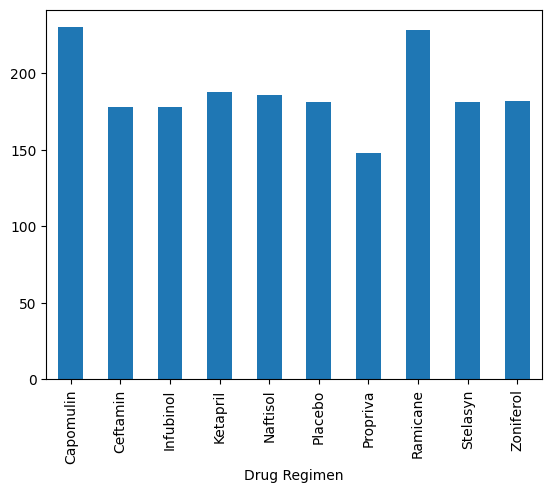

In [1925]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
barplotcounts = cleaned_combined_df.groupby('Drug Regimen')['Timepoint'].size()
barplotcounts.plot(kind='bar')

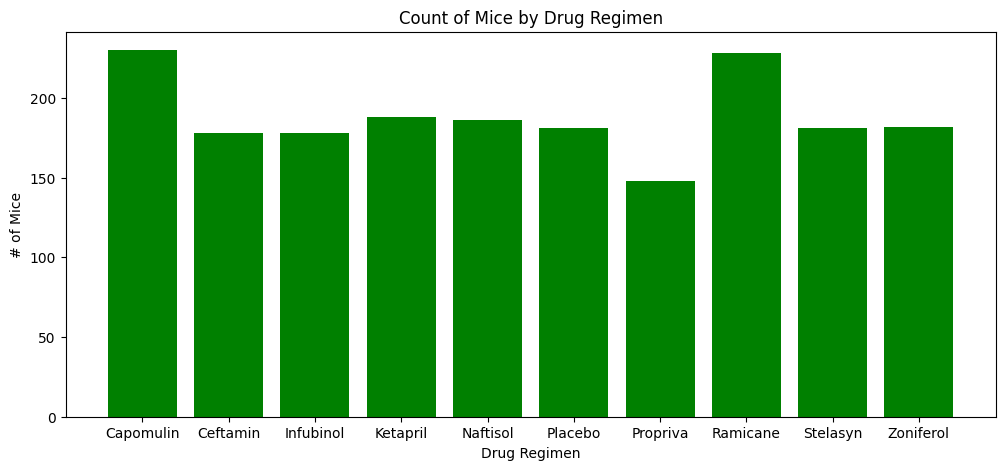

In [1926]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
barplotcounts = cleaned_combined_df.groupby('Drug Regimen')['Timepoint'].size()

plt.figure(figsize=(12, 5)) 
plt.bar(barplotcounts.index, barplotcounts.values, color='green')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
plt.title('Count of Mice by Drug Regimen')
plt.show()

<Axes: xlabel='Sex'>

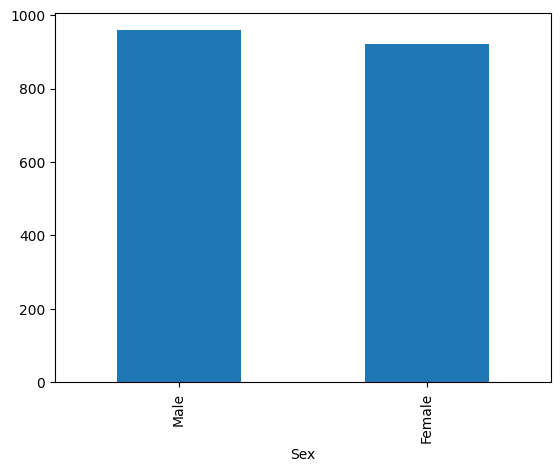

In [1927]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = cleaned_combined_df['Sex'].value_counts()
gender_plot.plot(kind='bar')

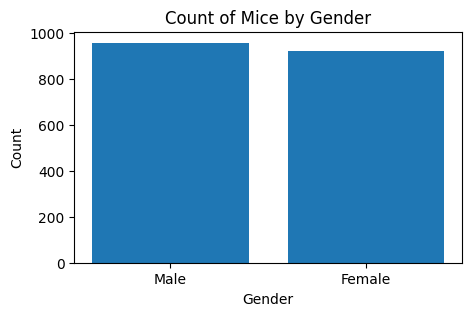

In [1928]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = cleaned_combined_df['Sex'].value_counts()
plt.figure(figsize=(5, 3))
plt.bar(gender_plot.index, gender_plot.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Mice by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [1929]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_combined_df[cleaned_combined_df['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volumes = filtered_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last().reset_index()
final_tumor_volumes = final_tumor_volumes.round(2)
final_tumor_volumes

,Mouse ID,Tumor Volume (mm3)
0,a203,67.97
1,a251,65.53
2,a275,63.00
3,a411,38.41
4,a444,43.05
...,...,...
95,y769,68.59
96,y793,31.90
97,y865,64.73
98,z578,30.64


In [1930]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentlist = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
treatmentStats = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatmentlist:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = cleaned_combined_df[cleaned_combined_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5 * iqr
    
    outliers = tumor_volumes[(tumor_volumes < lowerbound) | (tumor_volumes > upperbound)]

    treatment_info = {
        'Treatment': treatment,
        'Upper Quartile(Q1)': q1.round(3),
        'Lower Quartile(Q3)': q3.round(3),
        'IQR': iqr.round(3),}
    
    treatmentStats.append(treatment_info)

treatment_stats_df = pd.DataFrame(treatmentStats)
treatment_stats_df

,Treatment,Upper Quartile(Q1),Lower Quartile(Q3),IQR
0,Ramicane,36.675,45.000,8.325
1,Capomulin,37.686,45.000,7.314
2,Infubinol,47.312,57.314,10.002
3,Ceftamin,47.208,56.801,9.593


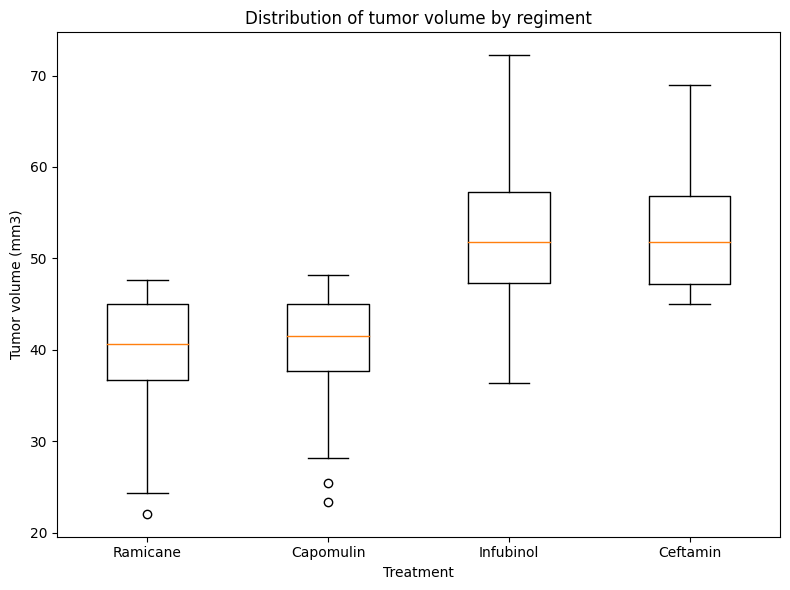

In [1931]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volume_data, labels=treatmentlist)
plt.xlabel('Treatment')
plt.ylabel('Tumor volume (mm3)')
plt.title('Distribution of tumor volume by regiment')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

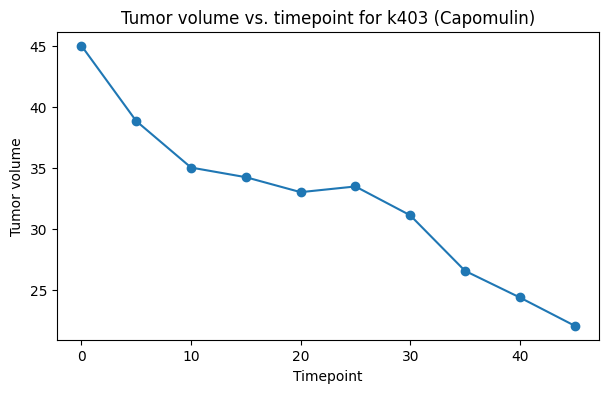

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [1932]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = 'k403'
capomulinplot = cleaned_combined_df[cleaned_combined_df['Mouse ID'] == mouse]

plt.figure(figsize=(7, 4))
plt.plot(capomulinplot['Timepoint'], capomulinplot['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor volume')
plt.title(f'Tumor volume vs. timepoint for {mouse} (Capomulin)')
plt.show()
capomulinplot

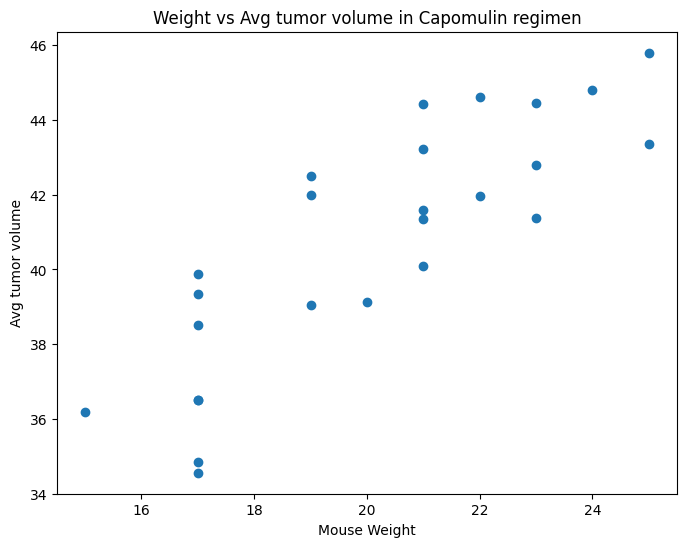

In [1933]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
entirecapomulin = cleaned_combined_df[cleaned_combined_df['Drug Regimen'] == 'Capomulin']

avgtumorvol = entirecapomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouseweight = entirecapomulin.groupby('Mouse ID')['Weight (g)'].first()

plt.figure(figsize=(8, 6))
plt.scatter(mouseweight, avgtumorvol, marker='o')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg tumor volume')
plt.title('Weight vs Avg tumor volume in Capomulin regimen')
plt.show()

## Correlation and Regression

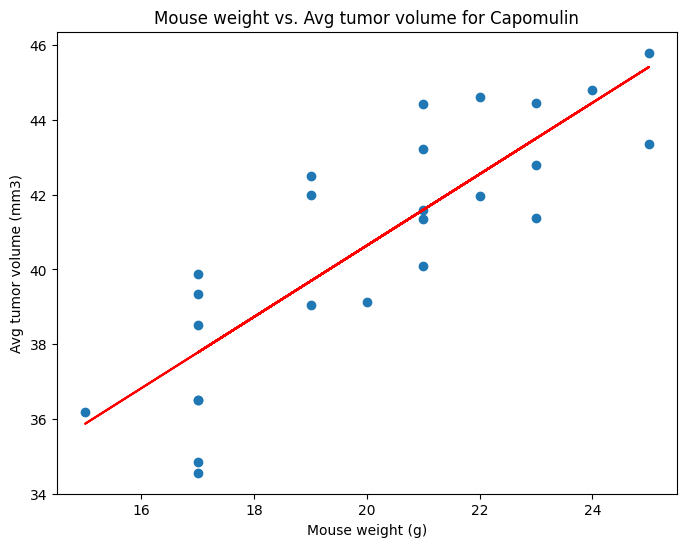

PearsonRResult(statistic=0.8419363424694721, pvalue=1.3225722434712393e-07)

In [1934]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouseweight, avgtumorvol)

slope, intercept, r_value, p_value, std_err = st.linregress(mouseweight, avgtumorvol)

plt.figure(figsize=(8, 6))
plt.scatter(mouseweight, avgtumorvol)
plt.plot(mouseweight, slope * mouseweight + intercept, color='r', label='Regression line')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Avg tumor volume (mm3)')
plt.title('Mouse weight vs. Avg tumor volume for Capomulin')
plt.show()
correlation